In [1]:
# Import useful libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import matplotlib_inline.backend_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import scikitplot as skplt

from termcolor import colored as c0

import pickle

%matplotlib inline


In [2]:
# read the data set of "MetS" in data

data = pd.read_excel('Metabolic_syndrome_data.xls')

# printing the data
data

,DBP,SBP,FastingBloodSugar,Triglycerides,HDLcholestrol,LDLcholestrol,IDFMetsynd,ATPMetssynd,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,70.0,110.0,78.400002,329.399994,33.599998,85.599998,1.0,1.0,NaN,NaN,NaN,NaN
1,60.0,100.0,156.600006,107.099998,40.599998,64.599998,1.0,1.0,NaN,NaN,NaN,NaN
2,65.0,110.0,91.000000,154.899994,31.100000,93.199997,1.0,0.0,NaN,NaN,NaN,DBP= diastolic blood pressure
3,60.0,97.0,91.699997,163.000000,45.900002,131.199997,1.0,1.0,NaN,NaN,NaN,SBP=systolic blood pressure
4,80.0,122.0,90.900002,140.800003,53.700001,101.300003,0.0,0.0,NaN,NaN,NaN,HDLCholesterol: The Good Cholesterol
...,...,...,...,...,...,...,...,...,...,...,...,...
10042,60.0,89.0,95.900002,84.599998,50.299999,55.900002,0.0,0.0,NaN,NaN,NaN,NaN
10043,60.0,100.0,158.000000,59.000000,64.000000,109.000000,0.0,0.0,NaN,NaN,NaN,NaN
10044,80.0,135.0,101.900002,187.199997,55.200001,126.599998,1.0,1.0,NaN,NaN,NaN,NaN
10045,70.0,100.0,80.300003,284.700012,36.299999,85.599998,1.0,1.0,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [3]:
# removing unnecessary columns

data.drop(data.columns[[7,8,9,10,11]], axis=1, inplace=True)
data.head(5)

,DBP,SBP,FastingBloodSugar,Triglycerides,HDLcholestrol,LDLcholestrol,IDFMetsynd
0,70.0,110.0,78.400002,329.399994,33.599998,85.599998,1.0
1,60.0,100.0,156.600006,107.099998,40.599998,64.599998,1.0
2,65.0,110.0,91.000000,154.899994,31.100000,93.199997,1.0
3,60.0,97.0,91.699997,163.000000,45.900002,131.199997,1.0
4,80.0,122.0,90.900002,140.800003,53.700001,101.300003,0.0


In [4]:
# Checking data type

data.dtypes

DBP                  float64
SBP                  float64
FastingBloodSugar    float64
Triglycerides        float64
HDLcholestrol        float64
LDLcholestrol        float64
IDFMetsynd           float64
dtype: object

In [5]:
data.describe()

,DBP,SBP,FastingBloodSugar,Triglycerides,HDLcholestrol,LDLcholestrol,IDFMetsynd
count,10046.000000,10046.000000,9983.000000,9983.000000,9981.000000,9982.000000,10038.000000
mean,69.827294,108.211427,97.065682,137.605279,46.418104,102.104087,0.335425
std,9.933945,17.034340,30.175229,82.507498,11.340256,25.459559,0.472162
min,0.000000,45.000000,53.299999,10.400000,13.300000,7.000000,0.000000
25%,60.000000,97.000000,84.099998,84.199997,38.299999,84.800003,0.000000
50%,70.000000,105.000000,90.300003,117.400002,45.000000,100.199997,0.000000
75%,77.000000,117.000000,98.099998,166.399994,53.000000,117.500000,1.000000
max,125.000000,235.000000,571.000000,1130.900024,138.300003,371.000000,1.000000


In [6]:
# Checking for missing values

data.isnull().values.any()

True

In [7]:
# Calculate the missing values in each column of data frame

data.isnull().sum()

DBP                   1
SBP                   1
FastingBloodSugar    64
Triglycerides        64
HDLcholestrol        66
LDLcholestrol        65
IDFMetsynd            9
dtype: int64

In [8]:
#  fixing missing values

#  find the mean value of the DBP, SBP, FastingBloodSugar, Triglycerides, HDLcholestrol and LDLcholestrol each
dbp_mean = data.DBP.mean()
dbp_mean = round(dbp_mean, 1)

sbp_mean = data.SBP.mean()
sbp_mean = round(sbp_mean, 1)

FastingBloodSugar_mean = data.FastingBloodSugar.mean()
FastingBloodSugar_mean = round(FastingBloodSugar_mean, 6)

Triglycerides_mean = data.Triglycerides.mean()
Triglycerides_mean = round(Triglycerides_mean, 6)

HDLcholestrol_mean = data.HDLcholestrol.mean()
HDLcholestrol_mean = round(HDLcholestrol_mean, 6)

LDLcholestrol_mean = data.LDLcholestrol.mean()
LDLcholestrol_mean = round(LDLcholestrol_mean, 6)

In [9]:
#  fill the mean value of the DBP, SBP, FastingBloodSugar, Triglycerides, HDLcholestrol and LDLcholestrol in data

data.DBP.fillna(dbp_mean, inplace=True)
data.SBP.fillna(sbp_mean, inplace=True)
data.FastingBloodSugar.fillna(FastingBloodSugar_mean, inplace=True)
data.Triglycerides.fillna(Triglycerides_mean, inplace=True)
data.HDLcholestrol.fillna(HDLcholestrol_mean, inplace=True)
data.LDLcholestrol.fillna(LDLcholestrol_mean, inplace=True)

In [10]:
# drop the rows in the IDFMetsynd column with missing values

data = data[~data.IDFMetsynd.isnull()].copy()

In [11]:
# Calculate the missing values in each column of data frame

data.isnull().sum()

DBP                  0
SBP                  0
FastingBloodSugar    0
Triglycerides        0
HDLcholestrol        0
LDLcholestrol        0
IDFMetsynd           0
dtype: int64

In [12]:
data

,DBP,SBP,FastingBloodSugar,Triglycerides,HDLcholestrol,LDLcholestrol,IDFMetsynd
0,70.0,110.0,78.400002,329.399994,33.599998,85.599998,1.0
1,60.0,100.0,156.600006,107.099998,40.599998,64.599998,1.0
2,65.0,110.0,91.000000,154.899994,31.100000,93.199997,1.0
3,60.0,97.0,91.699997,163.000000,45.900002,131.199997,1.0
4,80.0,122.0,90.900002,140.800003,53.700001,101.300003,0.0
...,...,...,...,...,...,...,...
10042,60.0,89.0,95.900002,84.599998,50.299999,55.900002,0.0
10043,60.0,100.0,158.000000,59.000000,64.000000,109.000000,0.0
10044,80.0,135.0,101.900002,187.199997,55.200001,126.599998,1.0
10045,70.0,100.0,80.300003,284.700012,36.299999,85.599998,1.0


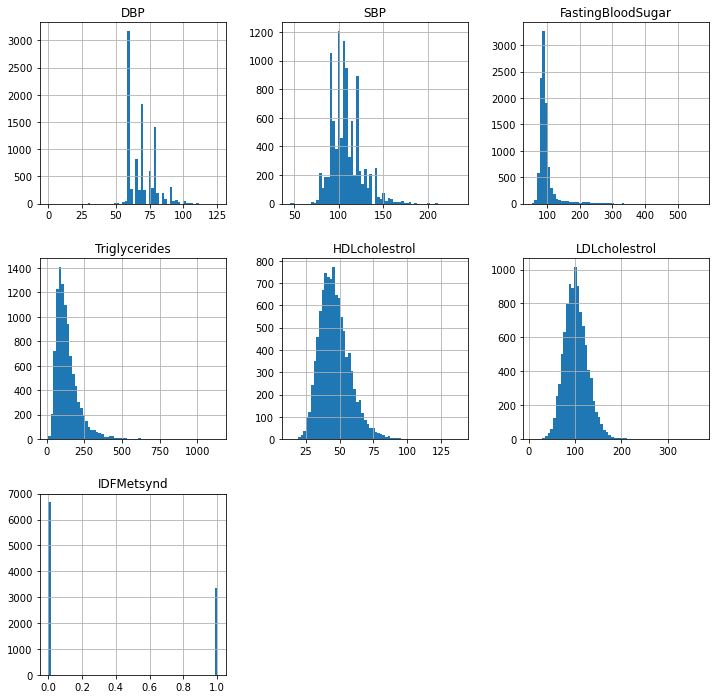

In [13]:
# histogram plots of  features and target columns

data.hist(figsize=(12,12), bins=64)
plt.show()

In [14]:
columns = ['DBP','SBP','FastingBloodSugar','Triglycerides','HDLcholestrol','LDLcholestrol']
cp = ['IDFMetsynd']

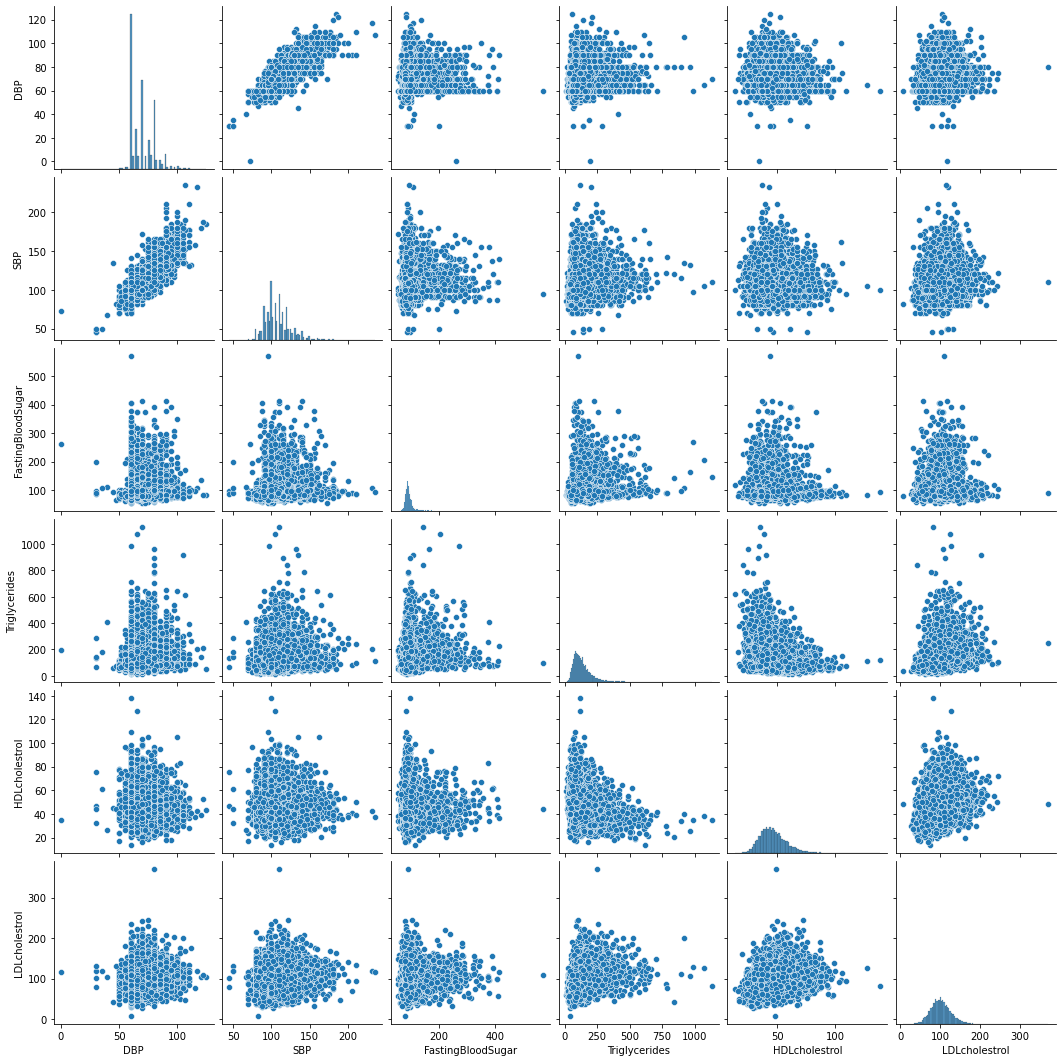

In [15]:
# plot the pair plot of DBP, SBP, FastingBloodSugar, Triglycerides, HDLcholestrol and LDLcholestrol in data dataframe.
sns.pairplot(data = data, vars= columns)
plt.show()

In [16]:
# checking response distribution

No_MetS = data[data['IDFMetsynd'] == 0]
MetS = data[data['IDFMetsynd'] == 1]

print(No_MetS.shape, MetS.shape)

(6671, 7) (3367, 7)


Text(0, 0.5, 'Frequency')

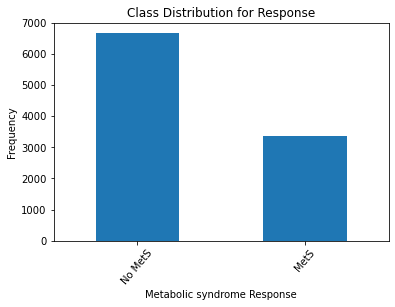

In [17]:
num_class = pd.value_counts(data['IDFMetsynd'], sort=True)
num_class.plot(kind = 'bar')
plt.title ('Class Distribution for Response')
plt.xticks(range(2), ['No MetS', 'MetS'], rotation=50)
plt.xlabel('Metabolic syndrome Response')
plt.ylabel('Frequency')

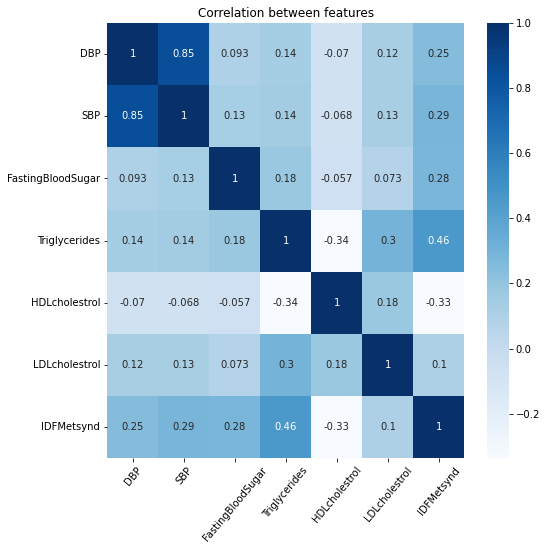

In [18]:
# correlation matrix between features
corr = data.corr()
plt.figure(figsize=(8,8))

hm = sns.heatmap(corr, cmap='Blues', annot=True,
                yticklabels=data.columns, xticklabels=data.columns)
plt.xticks(fontsize=10, rotation=50)
plt.yticks(fontsize=10)
plt.title('Correlation between features', fontsize=12)
plt.show()

In [19]:
# converting reponse variable to integer
    
data[cp] = data[cp].astype(int)
data.dtypes

DBP                  float64
SBP                  float64
FastingBloodSugar    float64
Triglycerides        float64
HDLcholestrol        float64
LDLcholestrol        float64
IDFMetsynd             int64
dtype: object

In [20]:
# data split

first_data = data.sample(frac=0.95, random_state=120)
second_data = data.drop(first_data.index)

In [21]:
# Confirming distribution of target variable in first_data

No_MetS = first_data[first_data['IDFMetsynd'] == 0]
MetS = first_data[first_data['IDFMetsynd'] == 1]

print(No_MetS.shape, MetS.shape)

(6329, 7) (3207, 7)


Text(0, 0.5, 'Frequency')

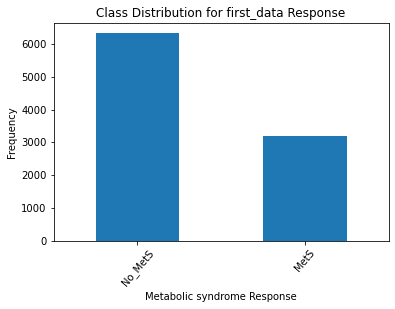

In [22]:
num_class = pd.value_counts(first_data['IDFMetsynd'], sort=True)
num_class.plot(kind = 'bar')
plt.title ('Class Distribution for first_data Response')
plt.xticks(range(2), ['No_MetS', 'MetS'], rotation=50)
plt.xlabel('Metabolic syndrome Response')
plt.ylabel('Frequency')

In [23]:
# Confirming distribution of target variable in Second_data

No_MetS = second_data[second_data['IDFMetsynd'] == 0]
MetS = second_data[second_data['IDFMetsynd'] == 1]

print(No_MetS.shape, MetS.shape)

(342, 7) (160, 7)


Text(0, 0.5, 'Frequency')

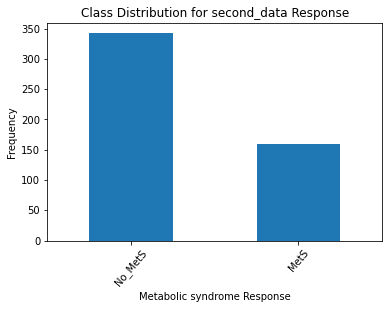

In [24]:
num_class = pd.value_counts(second_data['IDFMetsynd'], sort=True)
num_class.plot(kind = 'bar')
plt.title ('Class Distribution for second_data Response')
plt.xticks(range(2), ['No_MetS', 'MetS'], rotation=50)
plt.xlabel('Metabolic syndrome Response')
plt.ylabel('Frequency')

### Train test split

In [25]:
X = first_data.iloc[:,0:-1]
y = first_data.iloc[:,-1]

In [26]:
print(y.shape)
print(X.shape)
print('------------')
print(np.unique(y))

(9536,)
(9536, 6)
------------
[0 1]


In [27]:
# stratify test split to ensure that both the train and test sets have the proportion of examples
# in each class that is present in the provided “y” array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41, stratify=y)

### Feature importance

In [28]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [29]:
model.feature_importances_

array([0.08323588, 0.11822433, 0.22026526, 0.3075883 , 0.16865198,
       0.10203425])

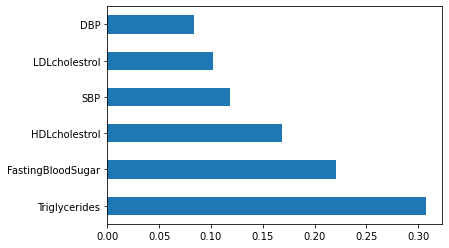

In [30]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

# Random Forest Model

In [31]:
# Model building and training
# Creating base model
rf = RandomForestClassifier()

# training the Model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# predicting the output
y_pred_rf = rf.predict(X_test)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

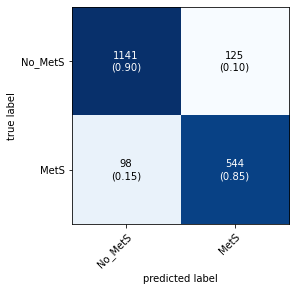

In [33]:
# Confusion matrix
clname = ['No_MetS', 'MetS']
rf_mats = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=rf_mats, figsize = (4, 4), class_names = clname, show_normed= True)

In [34]:
# Classification report

print(c0('RF Classification Report', attrs = ['bold']))
print(classification_report(y_test, y_pred_rf, target_names=clname))

RF Classification Report
              precision    recall  f1-score   support

     No_MetS       0.92      0.90      0.91      1266
        MetS       0.81      0.85      0.83       642

    accuracy                           0.88      1908
   macro avg       0.87      0.87      0.87      1908
weighted avg       0.88      0.88      0.88      1908



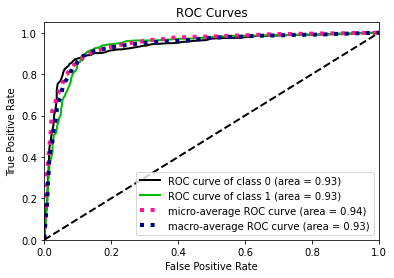

In [35]:
# ROC_AUC Curve

probs = rf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, probs)
plt.show()

### Hyperparameter Tuning - Random Forest Model 

In [36]:
#Randomized Search CV
# Use the random grid to search for best hyperparameters

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# number of features at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree                         
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# create random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900,
  2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, None],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [37]:
# Random search of parameters, using 5 fold cross validation, 
# search across 20 different combinations
# scorers = {
#     'AUC': 'roc_auc',
#     'Balanced Acuracy': 'balanced_accuracy'
# }

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=41, n_jobs = -1)

# Fit the model
rf_random.fit(X_train, y_train)

# print results
rf_random.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_sp

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [38]:
rf_random.best_score_

0.872576241325226

In [39]:
predictions=rf_random.predict(X_test)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

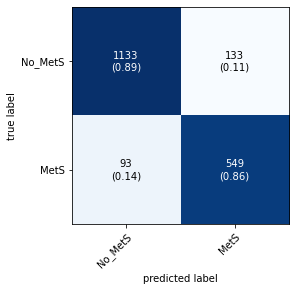

In [40]:
# Confusion matrix

rfcv_mats = confusion_matrix(y_test, predictions)
plot_confusion_matrix(conf_mat=rfcv_mats, figsize = (4, 4), class_names = clname, show_normed= True)

In [41]:
# Classification report

print(c0('Tuned RF Model Classification Report', attrs = ['bold']))
print(classification_report(y_test, predictions, target_names=clname))

Tuned RF Model Classification Report
              precision    recall  f1-score   support

     No_MetS       0.92      0.89      0.91      1266
        MetS       0.80      0.86      0.83       642

    accuracy                           0.88      1908
   macro avg       0.86      0.88      0.87      1908
weighted avg       0.88      0.88      0.88      1908



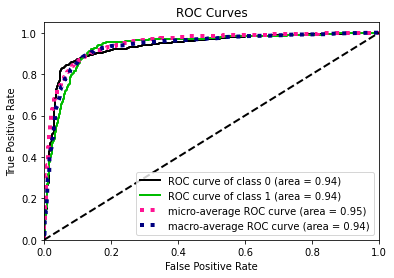

In [42]:
# ROC_AUC curve

rfcv_probs = rf_random.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, rfcv_probs)
plt.show()

# Logistic Regression

In [43]:
# Model building and training
clf = LogisticRegression()

# training the model using scaled data
clf.fit(X_train, y_train)

LogisticRegression()

In [44]:
# predicting output
y_predlr = clf.predict(X_test)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

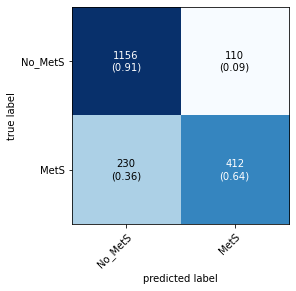

In [45]:
# Confusion matrix
lr_mats = confusion_matrix(y_test, y_predlr)
plot_confusion_matrix(conf_mat=lr_mats, figsize = (4, 4), class_names = clname, show_normed= True)

In [46]:
# Classification report
print(c0('LR Model Classification Report', attrs = ['bold']))
print(classification_report(y_test, y_predlr, target_names=clname))


LR Model Classification Report
              precision    recall  f1-score   support

     No_MetS       0.83      0.91      0.87      1266
        MetS       0.79      0.64      0.71       642

    accuracy                           0.82      1908
   macro avg       0.81      0.78      0.79      1908
weighted avg       0.82      0.82      0.82      1908



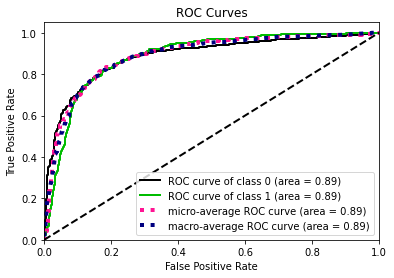

In [47]:
# ROC_AUC curve
lr_probs = clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, lr_probs)
plt.show()

# KNN

In [48]:
# Model building and training
knn = KNeighborsClassifier()

# training the model using unscaled data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# predicting output
y_predknn = knn.predict(X_test)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

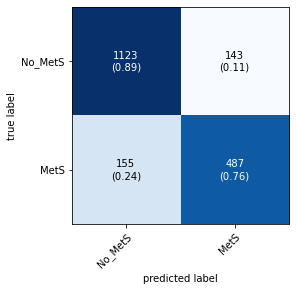

In [50]:
# Confusion matrix
knn_mats = confusion_matrix(y_test, y_predknn)
plot_confusion_matrix(conf_mat=knn_mats, figsize = (4, 4), class_names = clname, show_normed= True)


In [51]:
# Classification report
print(c0('KNN Model Classification Report', attrs = ['bold']))
print(classification_report(y_test, y_predknn, target_names=clname))

KNN Model Classification Report
              precision    recall  f1-score   support

     No_MetS       0.88      0.89      0.88      1266
        MetS       0.77      0.76      0.77       642

    accuracy                           0.84      1908
   macro avg       0.83      0.82      0.82      1908
weighted avg       0.84      0.84      0.84      1908



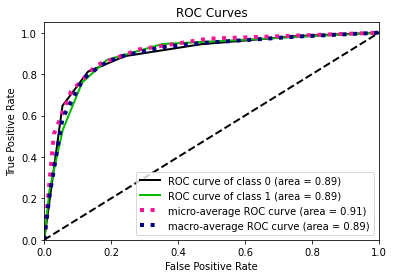

In [52]:
# ROC_AUC curve
knn_probs = knn.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, knn_probs)
plt.show()

### Hyperparameter Tunning - KNN Model

In [53]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use the random grid to search for best hyperparameters
knncv = RandomizedSearchCV(knn, hyperparameters, cv=10)

#Fit the model
best_model = knncv.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 22
Best p: 1
Best n_neighbors: 26


(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

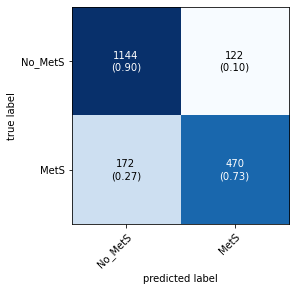

In [54]:
# predicting output
y_predknncv = knncv.predict(X_test)

# Confusion matrix
knncv_mats = confusion_matrix(y_test, y_predknncv)
plot_confusion_matrix(conf_mat=knncv_mats, figsize = (4, 4), class_names = clname, show_normed= True)

In [55]:
# Classification report
print(c0('Tunned KNN Model Classification Report', attrs = ['bold']))
print(classification_report(y_test, y_predknncv, target_names=clname))

Tunned KNN Model Classification Report
              precision    recall  f1-score   support

     No_MetS       0.87      0.90      0.89      1266
        MetS       0.79      0.73      0.76       642

    accuracy                           0.85      1908
   macro avg       0.83      0.82      0.82      1908
weighted avg       0.84      0.85      0.84      1908



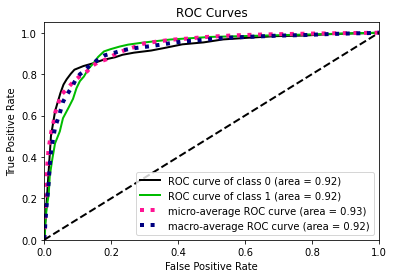

In [56]:
# ROC_AUC curve
knncv_probs = knncv.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, knncv_probs)
plt.show()

# Ensemble Model

In [57]:
# create ensemble model parameters from best models obtained above

models = [
    ('lr', clf),
    ('rf', rf_random)
]

model = StackingClassifier(estimators=models, final_estimator=knncv)
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_sp

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf',
                                RandomizedSearchCV(cv=5,
                                                   estimator=RandomForestClassifier(),
                                                   n_iter=20, n_jobs=-1,
                                                   param_distributions={'max_depth': [5,
                                                                                      10,
                                                                                      15,
                                                                                      20,
                                                                                      25,
                                                                                      30,
                                                                                      None],
                                                    

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

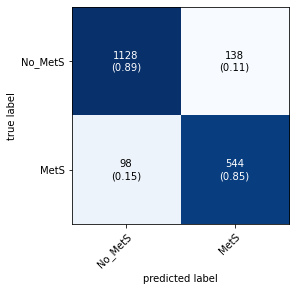

In [58]:
# predicting the output
y_predens = model.predict(X_test)

# Confusion matrix
ens_mats = confusion_matrix(y_test, y_predens)
plot_confusion_matrix(conf_mat=ens_mats, figsize = (4, 4), class_names = clname, show_normed= True)

In [59]:
# Classification report
print(c0('Ensemble Model Classification Report', attrs = ['bold']))
print(classification_report(y_test, y_predens, target_names=clname))

Ensemble Model Classification Report
              precision    recall  f1-score   support

     No_MetS       0.92      0.89      0.91      1266
        MetS       0.80      0.85      0.82       642

    accuracy                           0.88      1908
   macro avg       0.86      0.87      0.86      1908
weighted avg       0.88      0.88      0.88      1908



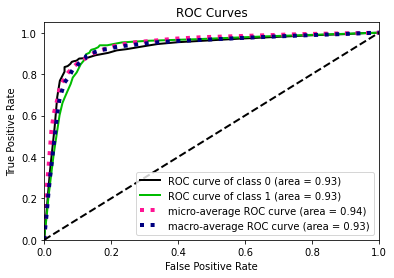

In [60]:
# ROC_AUC curve
ens_probs = model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, ens_probs)
plt.show()

In [61]:
# open a file to store the data
file = open('rf_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [62]:
second_data

,DBP,SBP,FastingBloodSugar,Triglycerides,HDLcholestrol,LDLcholestrol,IDFMetsynd
10,60.0,110.0,89.199997,141.199997,44.000000,96.800003,0
29,85.0,125.0,103.199997,155.100006,37.400002,104.099998,1
31,85.0,115.0,112.000000,149.000000,41.000000,98.000000,1
51,60.0,80.0,75.300003,56.000000,42.700001,87.300003,0
79,70.0,112.0,95.300003,99.500000,33.299999,94.099998,0
...,...,...,...,...,...,...,...
9974,65.0,117.0,84.500000,149.399994,23.600000,90.300003,0
9984,65.0,95.0,74.199997,61.500000,48.000000,82.000000,0
9993,80.0,130.0,95.099998,233.500000,40.099998,105.699997,1
10012,65.0,102.0,87.400002,204.500000,39.000000,109.300003,1
